In [1]:
import sys

sys.path.append('../../')
from dataset.mnist import load_mnist
from project2.network import Network
import numpy as np
import matplotlib.pyplot as plt

from common.optimizer.sgd import *

In [2]:
# 1. MNIST 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]

In [3]:
# 2. 학습 관련 변수 초기화
batch_size = 128
max_iterations = 2000

optimizer = SGD()
weight_init_methods = ["He", "Xavier", "1.0", "0.1", "0.01", "0.001"]

graph_colors = {"He": "r", "Xavier": "g", "1.0": "y", "0.1": "b", "0.01": "m", "0.001": "c"}

In [4]:
# 3. Relu + He Initialization 최적화 학습 비교
# 3-1. 네트워크 초기화
relu_networks = {}
relu_train_loss = {}

for key in weight_init_methods:
    relu_networks[key] = Network(
        input_size=784,
        output_size=10,
        hidden_size_list=[100, 80, 50, 50, 50],
        activation_function="relu",
        weight_init_std=key,
    )
    relu_train_loss[key] = []

In [5]:
# 3-2. 훈련 및 비교
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_methods:
        grads = relu_networks[key].gradient(x_batch, t_batch)
        optimizer.update(relu_networks[key].params, grads)

        loss = relu_networks[key].loss(x_batch, t_batch)
        relu_train_loss[key].append(loss)

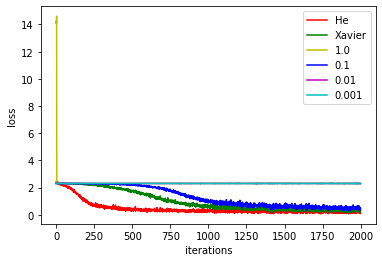

In [6]:
# 3-3. 결과 그래프 출력
x = np.arange(max_iterations)
for key in weight_init_methods:
    plt.plot(x, relu_train_loss[key], graph_colors[key], label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()